# Get the data

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the dowloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-02-12 14:04:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 64.233.170.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  17.1MB/s    in 7.8s    

2023-02-12 14:05:01 (13.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img
     

Image shape: (512, 287, 3)


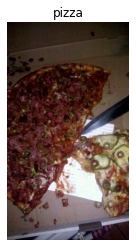

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [7]:
img

array([[[20,  5,  0],
        [19,  4,  0],
        [19,  4,  1],
        ...,
        [ 7,  6,  2],
        [ 3,  4,  0],
        [ 0,  2,  0]],

       [[19,  4,  0],
        [16,  3,  0],
        [16,  2,  0],
        ...,
        [ 6,  5,  1],
        [ 4,  3,  0],
        [ 1,  2,  0]],

       [[16,  5,  0],
        [14,  3,  0],
        [14,  3,  0],
        ...,
        [ 7,  3,  0],
        [ 3,  2,  0],
        [ 1,  0,  0]],

       ...,

       [[86, 85, 83],
        [86, 85, 83],
        [90, 86, 87],
        ...,
        [33,  3, 13],
        [37,  5, 16],
        [41,  8, 19]],

       [[92, 88, 87],
        [91, 87, 86],
        [93, 87, 89],
        ...,
        [31,  1, 11],
        [37,  4, 15],
        [42,  6, 18]],

       [[79, 73, 73],
        [78, 72, 72],
        [82, 73, 76],
        ...,
        [30,  0, 10],
        [35,  2, 13],
        [40,  4, 16]]], dtype=uint8)

In [8]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.07843137, 0.01960784, 0.        ],
        [0.0745098 , 0.01568627, 0.        ],
        [0.0745098 , 0.01568627, 0.00392157],
        ...,
        [0.02745098, 0.02352941, 0.00784314],
        [0.01176471, 0.01568627, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       [[0.0745098 , 0.01568627, 0.        ],
        [0.0627451 , 0.01176471, 0.        ],
        [0.0627451 , 0.00784314, 0.        ],
        ...,
        [0.02352941, 0.01960784, 0.00392157],
        [0.01568627, 0.01176471, 0.        ],
        [0.00392157, 0.00784314, 0.        ]],

       [[0.0627451 , 0.01960784, 0.        ],
        [0.05490196, 0.01176471, 0.        ],
        [0.05490196, 0.01176471, 0.        ],
        ...,
        [0.02745098, 0.01176471, 0.        ],
        [0.01176471, 0.00784314, 0.        ],
        [0.00392157, 0.        , 0.        ]],

       ...,

       [[0.3372549 , 0.33333333, 0.3254902 ],
        [0.3372549 , 0.33333333, 0.3254902 ],
        [0.35294118, 0


##  CNN to find patterns in our images, more specifically:

* Load our images
* Preprocess our images
* Build a CNN to fin patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
  

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 227ms/step - loss: 0.6644 - accuracy: 0.5807 - val_loss: 0.5855 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4596 - accuracy: 0.7920 - val_loss: 0.3631 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3906 - accuracy: 0.8247 - val_loss: 0.3347 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3757 - accuracy: 0.8367 - val_loss: 0.3827 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3139 - accuracy: 0.8800 - val_loss: 0.3981 - val_accuracy: 0.8240


In [10]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Multi-class Classification

In [11]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-12 14:06:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 22s     

2023-02-12 14:06:35 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Becoming one with the data

In [12]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")


There are 2 directories and 0 images in '10_food_classes_all_data
There are 10 directories and 0 images in '10_food_classes_all_data/train
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings
There are 10 directorie

In [13]:
# We'll now setup the training and test directory paths.
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [14]:
# Let's get the class names
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Also we can define a fuction to visualize an image from the training dataset.

In [15]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img
     

Image shape: (512, 512, 3)


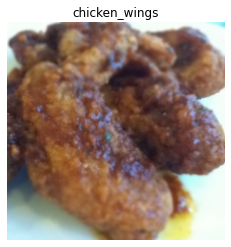

In [16]:
# View a random images form the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [40]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a Model

In [18]:
import tensorflow as tf


model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")  # changed to have 10 output neurons.
])

# Compile the model
model_2.compile(loss= "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

###  4. Fit the model

In [19]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 209ms/step - loss: 2.2024 - accuracy: 0.1837 - val_loss: 2.0083 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.9666 - accuracy: 0.3071 - val_loss: 1.9792 - val_accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 47s 201ms/step - loss: 1.7086 - accuracy: 0.4195 - val_loss: 1.9113 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 1.1093 - accuracy: 0.6265 - val_loss: 2.2429 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 70s 299ms/step - loss: 0.5016 - accuracy: 0.8369 - val_loss: 3.1097 - val_accuracy: 0.2868


### 5. Evaluate the model

In [20]:
# Evaluate on the test data
model_2.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 3.1097 - accuracy: 0.2868


[3.109663248062134, 0.28679999709129333]

Let's define a function that allow us to plot the accuracy and loss curves in separactly graphs.

In [21]:
# Check out the model'loss curves

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

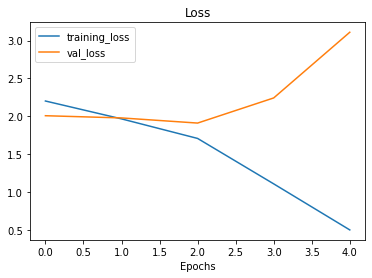

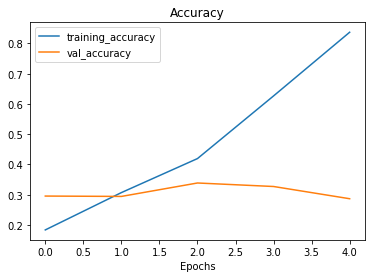

In [22]:
plot_loss_curves(history_2)

Our model are **Overfitting**, it's too good with the training data but quite badly with unseen new data. 

Let's try to reduce his overfitting.

* Get mote data
* Simpliy the model
* Add more Max2D Layers
* Data augmentation
* Transfer Learning

### 6. Adjust the model parameters

Since get more data is pretty complicated at this moment because involved to take more pictures, let's try to simplify our model first.

In [23]:
# Try a simplified model (removed two layers)
# Let's try to remove 2 convolutional layers..
model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")  # changed to have 10 output neurons.
])

# Compile the model
model_9.compile(loss= "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [24]:
# Fit the model with 2x Conv layers removed
history_9 = model_9.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))


Epoch 1/5
235/235 [==============================] - 58s 242ms/step - loss: 2.1299 - accuracy: 0.2324 - val_loss: 2.0168 - val_accuracy: 0.2644
Epoch 2/5
235/235 [==============================] - 59s 250ms/step - loss: 1.7890 - accuracy: 0.3880 - val_loss: 1.8887 - val_accuracy: 0.3236
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.4524 - accuracy: 0.5215 - val_loss: 1.9314 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.9898 - accuracy: 0.6903 - val_loss: 2.1991 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 49s 208ms/step - loss: 0.5329 - accuracy: 0.8531 - val_loss: 2.5881 - val_accuracy: 0.3016


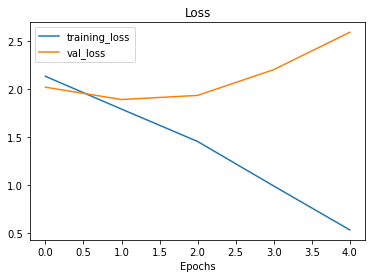

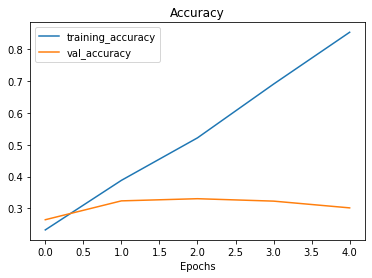

In [25]:
# Check out the loss curves of model_10
plot_loss_curves(history_9)

In [26]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

Even without 2 Conv layers, our model gets the same results, almost 300,000 trained parameters.
The complexity is the same, so it's still dramatically overfit.

In this case maybe a **Data augmetation** can solve our problems.

In [27]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                                                              target_size=(224,224),
                                                                                                              batch_size=32,
                                                                                                              class_mode= 'categorical')


Found 7500 images belonging to 10 classes.


In [28]:
# Let's create another model but this time we''ll fit it on the augmented train data.
model_10 = tf.keras.models.clone_model(model_2)

model_10.compile(loss= 'categorical_crossentropy',
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [29]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch= len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 119s 499ms/step - loss: 2.2099 - accuracy: 0.1825 - val_loss: 2.0367 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 115s 491ms/step - loss: 2.1003 - accuracy: 0.2477 - val_loss: 1.9729 - val_accuracy: 0.2776
Epoch 3/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0536 - accuracy: 0.2724 - val_loss: 1.9022 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 121s 515ms/step - loss: 2.0087 - accuracy: 0.2944 - val_loss: 1.8612 - val_accuracy: 0.3696
Epoch 5/5
235/235 [==============================] - 151s 643ms/step - loss: 1.9766 - accuracy: 0.3064 - val_loss: 1.7991 - val_accuracy: 0.3896


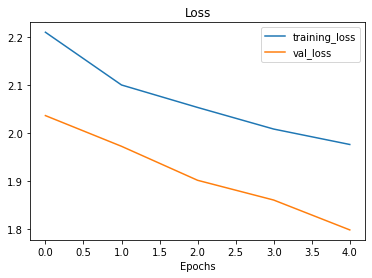

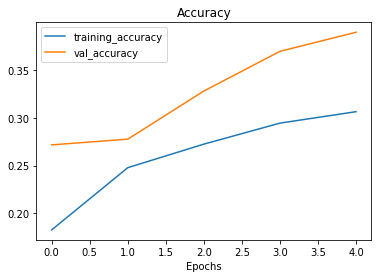

In [30]:
# Check out our model's performance with augmented data
plot_loss_curves(history_10)

Much better ! The loss curves are  closer to eachother. Although our model din't perform as well on ghe augmented taining set

Maybe if we keep it training for longer this evaluation metrics might continue  improving. 

The transfer learning is the best path to success

### Making prediction with our trained model

---



In [31]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [41]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # Get the predicted class
  if len(pred[0])> 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
  


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's get some of our custom images

In [42]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 1s 618ms/step
[[0.01589165 0.03778147 0.00930599 0.13166289 0.07166389 0.07332413
  0.01807657 0.03600466 0.56243825 0.04385044]]


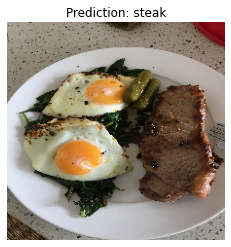

In [44]:
# Make a prediction usinng model_11
pred_and_plot(model=model_10, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Nice!

1/1 [==============================] - 0s 61ms/step
[[0.2502049  0.22863139 0.01132501 0.11158694 0.05125578 0.00878009
  0.1495891  0.03792058 0.03257304 0.11813314]]


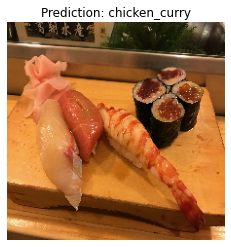

In [46]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

oh..

1/1 [==============================] - 0s 19ms/step
[[0.04254526 0.02325024 0.03274777 0.07348461 0.05680891 0.07615922
  0.08176772 0.18341352 0.1458938  0.28392893]]


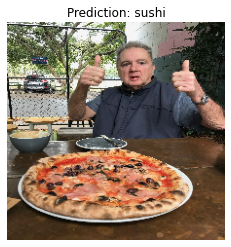

In [49]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 59ms/step
[[0.03802255 0.02995626 0.02446484 0.07437274 0.06183636 0.17380902
  0.18083261 0.07110364 0.09542624 0.2501757 ]]


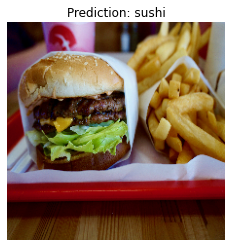

In [52]:
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

## Saving and loading our model

In [54]:
# Save a model
model_10.save("saved_trained_model")

In [55]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 14s 174ms/step - loss: 1.7991 - accuracy: 0.3896


[1.7990833520889282, 0.38960000872612]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)